In [1]:
import numpy as np
import re
import math
import sys
sys.path.append('/home/antonino/Scrivania/AnGUs')

In [2]:
from mymod_general import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style
style.use('.matplotrc')

In [4]:
colors=['blue','red']

In [25]:
FSIZE  = 40
FSIZE1 = 36

fig, ax = plt.subplots(1,figsize=(12,10))
fig1, ax1 = plt.subplots(1,figsize=(12,10))

factor = 128*(64**3)*(0.0809**4) 

#gluon
col  = colors[0]#colormaps['g'](icol)

xg, yg, dyg = read_pickle('tmp_TCpl0_g.pkl')
idxg = [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58]
ax.errorbar(  xg[idxg], yg[idxg]/factor, dyg[idxg]/factor, 
            linestyle='', marker='o', color=col, label='field theo.' )

#fermion
col1  =  colors[1]#colormaps['f'](icol)

xf, yf, dyf =  read_pickle('tmp_TCpl0_f.pkl')
idx = [18, 38, 58, 78, 98, 118, 138, 158, 178, 198, 199]

ax1.errorbar( xf[idx], yf[idx]/factor, dyf[idx]/factor, 
             linestyle='', marker='o', color=col1, label='spectral proj.' )

#setcolors
for sp in ax.spines.values():
    sp.set_linewidth(1.3) 
for sp in ax1.spines.values():
    sp.set_linewidth(1.3) 

# Decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax.set_xlabel(r'$\tau_{\rm flow}$', fontsize=FSIZE)
ax1.set_xlabel(r"$M_{\rm thr}$ [MeV]", fontsize=FSIZE)

ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
ax1.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
# ax.xaxis.set_label_coords(1.055, 0.010)
# ax1.xaxis.set_label_coords(1.125, 0.006)

ax.legend(fontsize=FSIZE1, loc='upper left')
ax1.legend(fontsize=FSIZE1, loc='upper left')

# # ax (Y axis)
ax.set_ylabel(r'$\chi^{top}$ [fm$^{-4}$]', fontsize=FSIZE)
ax1.set_ylabel(r'$\chi^{top}$ [fm$^{-4}$]', fontsize=FSIZE)

ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
ax1.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
# ax.yaxis.set_label_coords(-0.08,1.02)
# ax1.yaxis.set_label_coords(-0.08,1.02)

# ax.grid()
# ax1.grid()

ax1.set_xlim(right=65)
# ax1.set_ylim(0.04,0.16)

fig.tight_layout()
fig1.tight_layout()

fig.savefig('Susc_g.pdf')
fig1.savefig('Susc_f.pdf')

plt.show()

################################################################


# Plot Line2 (Right Y Axis)
# ax.errorbar( 
#               color=colors[1], marker='*', **kwargs)
# ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis

# ax2.errorbar( x_g[3::3], y_g[3::3]/factor, dy_g[3::3]/factor,
#              color=colors[0], marker='o', **kwargs)

# ax.errorbar( [120,], y_g[3:4]/factor, dy_g[3:4]/factor, color=colors[0], marker='o', label='field theo.', **kwargs )
# ax.errorbar( [120,], y_f[3:4]/factor, dy_f[3:4]/factor, color=colors[1], marker='*', label='spectral proj.', **kwargs )

# for sp in ax2.spines.values():
#     sp.set_linewidth(1.3) 

# # Decorations
# # # ax (bottom X axis)
# ax2.set_xlabel(r'$\tau_{flow}$', fontsize=FSIZE)
# ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1)

# # # ax2 (top X axis)
# ax.set_xlabel(r"$\lambda_{thr}$ [MeV]", fontsize=FSIZE)
# ax2.tick_params(axis='x', labelsize=FSIZE1)

# # # ax (Y axis)
# ax.ticklabel_format(axis='y', style="sci", scilimits=(0,0) )
# ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1 )
# ax.yaxis.get_offset_text().set_visible(False)

# ax.text( 0.01, 1.06, r'$\times$1e-4', va='center', ha='center', transform=ax.transAxes, size=FSIZE1)

# ax.legend( loc=0, ncol=2, fontsize=FSIZE1)

# fig.tight_layout()
# fig.savefig('TC_susc.pdf')

# ax.set_xlim(10, 60)
# ax2.set_xlim(0.1,)
# plt.show()

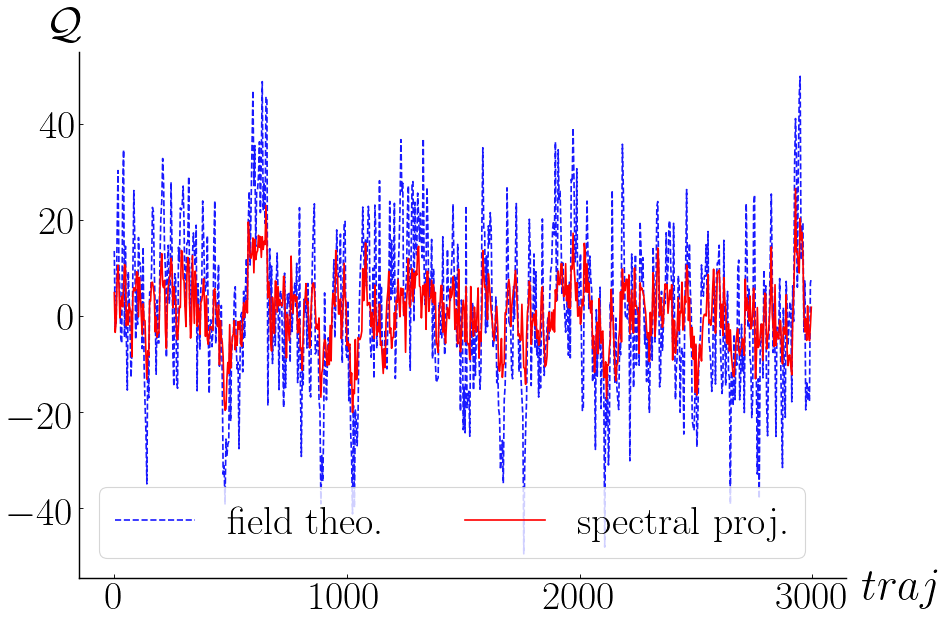

In [16]:
FSIZE  = 40
FSIZE1 = 36

def reorder( arr ):
    assert( len(arr)==750 )
    return np.concatenate([arr[375:][::-1],arr[:375]],axis=0)

x   = read_pickle('tmp_TCpl1_x.pkl')[0]
y_g = read_pickle('tmp_TCpl1_y_g.pkl')[0]
y_f = read_pickle('tmp_TCpl1_y_f.pkl')[0]

fig, ax = plt.subplots(1, figsize=(12,8))

ax.plot( x, y_g, label="field theo.", color=colors[0], linestyle='--', alpha=0.9)
ax.plot( x, y_f, label="spectral proj.", color=colors[1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.grid()
ax.legend( fontsize=FSIZE1, frameon=True, ncol=2)
for sp in ax.spines.values():
    sp.set_linewidth(1.3) 

# # ax (X axis)
ax.set_xlabel(r"$traj$", fontsize=FSIZE)
ax.xaxis.set_label_coords(1.07, 0.015)

ax.tick_params(axis='x', labelsize=FSIZE1, top=False)

# # ax (Y axis)
ax.set_ylabel(r'$\mathcal{Q}$', fontsize=FSIZE, rotation=0)
ax.yaxis.set_label_coords(-0.015, 1.01)
ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )

fig.tight_layout()
fig.savefig('TC_mchist.pdf')
plt.show()

In [15]:
FSIZE  = 40
FSIZE1 = 36

fig, ax = plt.subplots(1, figsize=(12,8))

y0 = read_pickle('tmp_TCpl2_y0.pkl')[0]
y1 = read_pickle('tmp_TCpl2_y1.pkl')[0]

# histogram
ax.hist(y0, bins=np.linspace(-51.5,50.5,103)+0.5, histtype='stepfilled', density=True, color=colors[0], alpha=0.5, label='field theo.')
ax.hist(y0, bins=np.linspace(-51.5,50.5,103)+0.5, histtype='step', density=True, linestyle='--', edgecolor=colors[0],linewidth=2.0)
ax.hist(y1, bins=np.linspace(-51.5,50.5,103)+0.5, histtype='stepfilled', density=True, color=colors[1], alpha=0.5, label='spectral proj.')
ax.hist(y1, bins=np.linspace(-51.5,50.5,103)+0.5, histtype='step', density=True, linestyle='--',edgecolor=colors[1], linewidth=2.0)
ax.legend(loc='upper left', fontsize=FSIZE1)
#ax.grid()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# # ax (X axis)
ax.set_xlabel(r'$\mathcal{Q}$', fontsize=FSIZE)
ax.tick_params(axis='x', labelsize=FSIZE1, top=False)
ax.xaxis.set_label_coords(1.025, 0.010)

# # ax (Y axis)
ax.set_ylabel(r"\#$\mathcal{Q}$", fontsize=FSIZE, rotation=0)
ax.tick_params(axis='y', labelsize=FSIZE1, right=False )
ax.yaxis.set_label_coords(-0.025, 1.01)

for sp in ax.spines.values():
    sp.set_linewidth(1.3) 

fig.tight_layout()
plt.savefig('TC_histogram.pdf')

plt.show()

In [21]:
#fit functions
def expplateau_f( x, a, b, m ):
    return a/(1 + b*np.exp(-m**2*x))
def plateau_f(x,a):
    return np.ones(len(x))*a
fit_f   = {'p':{'p':plateau_f},'e':{'e':expplateau_f}}
fit_kw  = {'p':{'p':{'a':1}},'e':{'e':{'a':1,'b':1,'c':0.25}}}

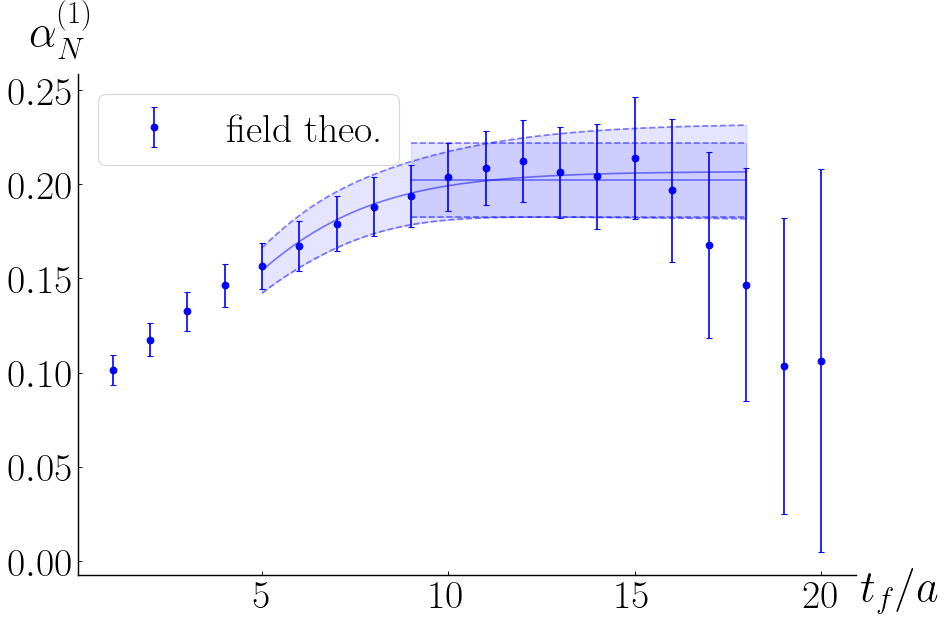

In [22]:
FSIZE  = 40
FSIZE1 = 36

fig, ax     = plt.subplots(1,figsize=(12,8))
fig1, ax1   = plt.subplots(1,figsize=(12,8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#Gluonic
col = colors[0]
kw_tmp = {'color':col, 'linestyle':'', 'marker':'*'}

x, yg, dyg = read_pickle('tmp_AApl1_xydyg.pkl')

ax.errorbar(x, yg, dyg, linestyle='', marker='o', label='field theo.', color=col)

#fit plateau
r = read_pickle('tmp_AApl1_rgp.pkl')[0]

x_aux = np.linspace( *r['range'],1000)
print_plotfit( ax, x_aux, fit_f['p']['p'], r['p']['jks'], 
                  fill={'color':col,'alpha':0.1}, 
                  kwargs_blines={'linestyle':'--','color':col,'alpha':0.5}, 
                  color=col, alpha=0.5)
    
#fit expplateau
r = read_pickle('tmp_AApl1_rge.pkl')[0]

x_aux = np.linspace( *r['range'],1000)
print_plotfit( ax, x_aux, fit_f['e']['e'], r['e']['jks'], 
              fill={'color':col,'alpha':0.1}, 
              kwargs_blines={'linestyle':'--','color':col,'alpha':0.5}, 
              color=col, alpha=0.5)

#Fermionic
col = colors[1]
kw_tmp = {'color':col, 'linestyle':'', 'marker':'*'}

x, yf, dyf = read_pickle('tmp_AApl1_xydyf.pkl')
    
ax1.errorbar(x, yf, dyf, linestyle='', marker='o', label='spectral proj.', color=col)

#fit plateau
r = read_pickle('tmp_AApl1_rfp.pkl')[0]

x_aux = np.linspace( *r['range'],1000)
print_plotfit( ax1, x_aux, fit_f['p']['p'], r['p']['jks'], 
                  fill={'color':col,'alpha':0.1}, 
                  kwargs_blines={'linestyle':'--','color':col,'alpha':0.5}, 
                  color=col, alpha=0.5)
    
#fit expplateau
r = read_pickle('tmp_AApl1_rfe.pkl')[0]

x_aux = np.linspace( *r['range'],1000)
print_plotfit( ax1, x_aux, fit_f['e']['e'], r['e']['jks'], 
              fill={'color':col,'alpha':0.1}, 
              kwargs_blines={'linestyle':'--','color':col,'alpha':0.5}, 
              color=col, alpha=0.5)

# ax.grid()
# ax1.grid()
for sp in ax.spines.values():
    sp.set_linewidth(1.3) 
for sp in ax1.spines.values():
    sp.set_linewidth(1.3) 

# # ax2 (top X axis)
ax.set_xlabel(r"$t_f/a$ ", fontsize=FSIZE)
ax.tick_params(axis='x', labelsize=FSIZE1, top=False )
ax.legend(fontsize=FSIZE1, loc='upper left')
ax1.set_xlabel(r"$t_f/a$ ", fontsize=FSIZE)
ax1.tick_params(axis='x', labelsize=FSIZE1, top=False )
ax1.legend(fontsize=FSIZE1, loc='upper left')
ax.xaxis.set_label_coords(1.055, 0.010)
ax1.xaxis.set_label_coords(1.055, 0.010)

# # ax (Y axis)
ax.set_ylabel(r'$\alpha^{(1)}_N$', fontsize=FSIZE, rotation=0)
ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
ax1.set_ylabel(r'$\alpha^{(1)}_N$', fontsize=FSIZE, rotation=0)
ax1.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
ax.yaxis.set_label_coords(-0.02,1.015)
ax1.yaxis.set_label_coords(-0.02,1.015)

ax1.set_ylim( *ax.get_ylim() )
fig.tight_layout()
fig1.tight_layout()

fig.savefig('Alfa_tf_g.pdf')
fig1.savefig('Alfa_tf_f.pdf')
plt.show()

In [26]:
FSIZE  = 40
FSIZE1 = 36

fig, ax = plt.subplots(1,figsize=(12,10))
fig1, ax1 = plt.subplots(1,figsize=(12,10))
#icol    = 0.75

#gluon
col  = colors[0]#colormaps['g'](icol)

xg, yg, dyg = read_pickle('tmp_AApl2_xydyg.pkl')

ax.errorbar( xg, yg, dyg.squeeze(), linestyle='', marker='o', color=col, label='field theo.' )

#fermion
col1  =  colors[1]#colormaps['f'](icol)

xf, yf, dyf = read_pickle('tmp_AApl2_xydyf.pkl')

ax1.errorbar( xf, yf, dyf.squeeze(), linestyle='', marker='o', color=col1, label='spectral proj.' )

#setcolors
for sp in ax.spines.values():
    sp.set_linewidth(1.3) 
for sp in ax1.spines.values():
    sp.set_linewidth(1.3) 

# Decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax.set_xlabel(r'$\tau_{\rm flow}$', fontsize=FSIZE)
ax1.set_xlabel(r"$M_{\rm thr}$ [MeV]", fontsize=FSIZE)

ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
ax1.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
# ax.xaxis.set_label_coords(1.055, 0.010)
# ax1.xaxis.set_label_coords(1.125, 0.006)

ax.legend(fontsize=FSIZE1, loc='upper left')
ax1.legend(fontsize=FSIZE1, loc='upper left')

# # ax (Y axis)
ax.set_ylabel(r'$\alpha^{(1)}_N$', fontsize=FSIZE, rotation=0)
ax1.set_ylabel(r'$\alpha^{(1)}_N$', fontsize=FSIZE, rotation=0)

ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
ax1.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
ax.yaxis.set_label_coords(-0.02,1.02)
ax1.yaxis.set_label_coords(-0.02,1.02)

# ax.grid()
# ax1.grid()

ax.set_ylim(0.16,0.25)
ax1.set_ylim(0.04,0.16)

fig.tight_layout()
fig1.tight_layout()

fig.savefig('Alfa_tc_g.pdf')
fig1.savefig('Alfa_tc_f.pdf')

plt.show()

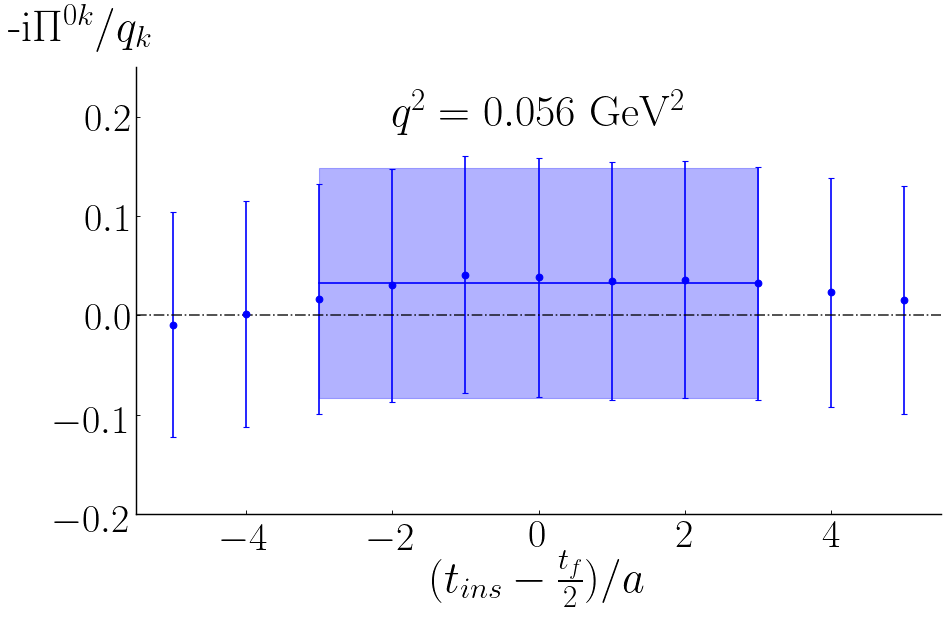

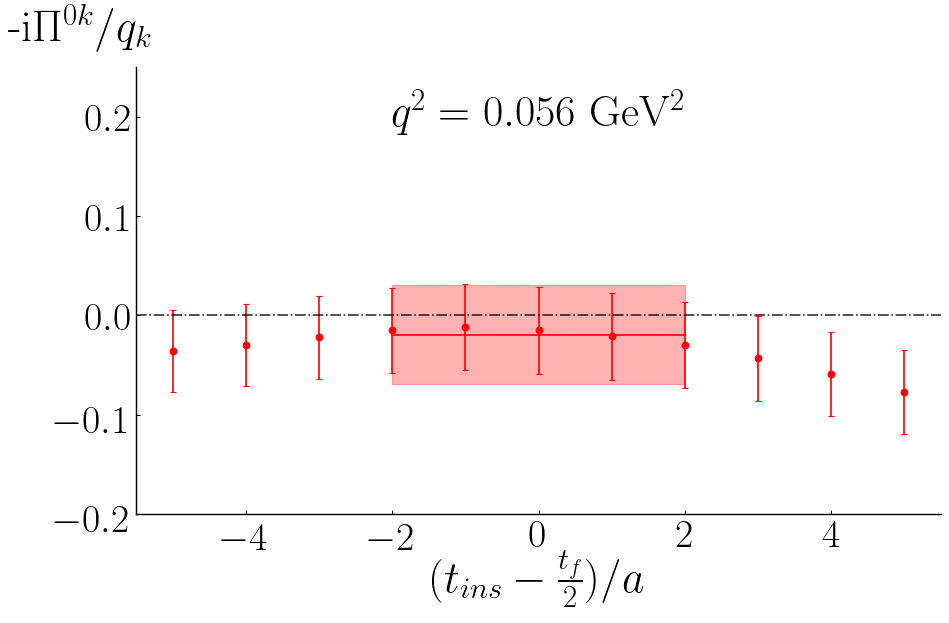

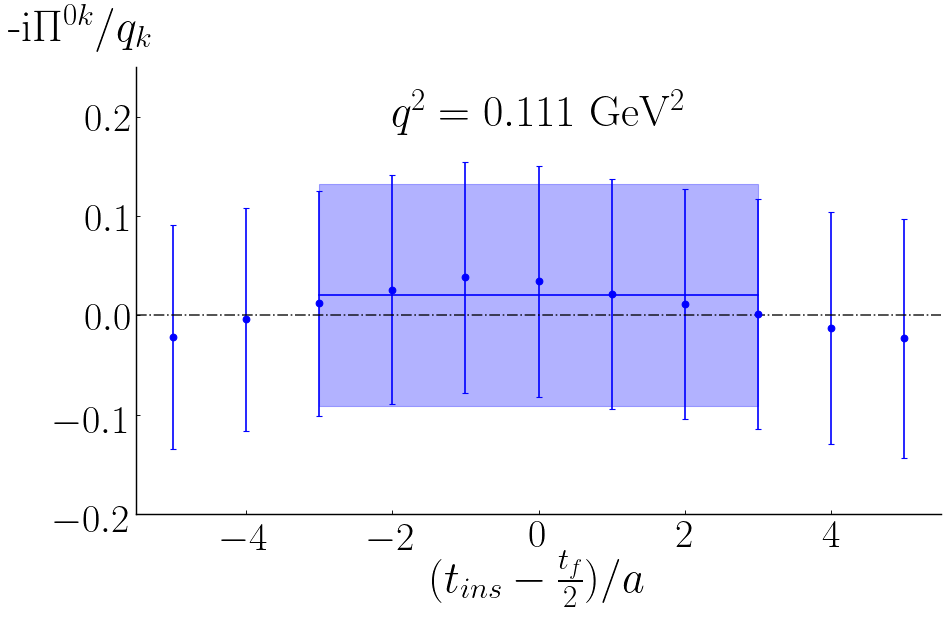

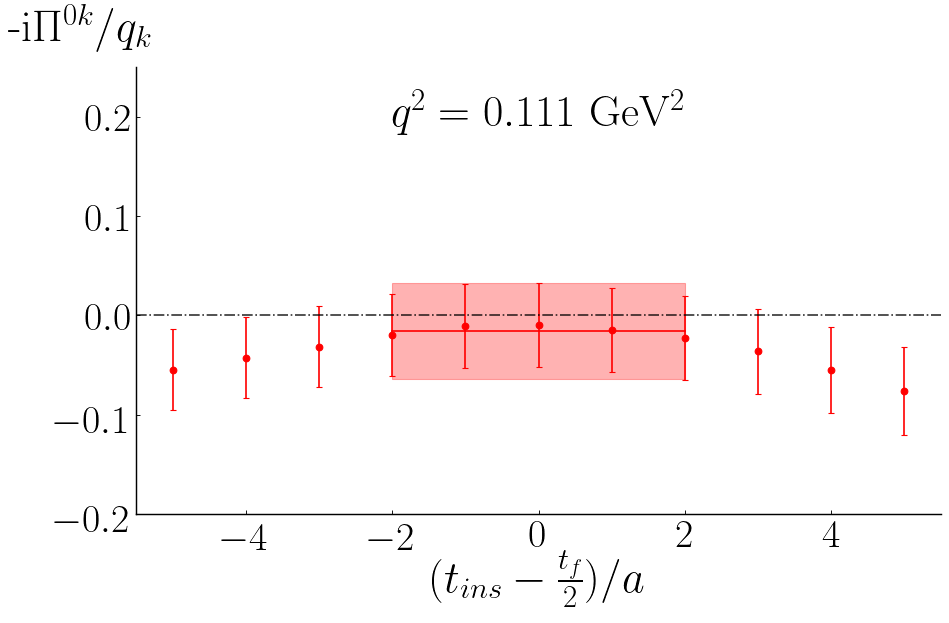

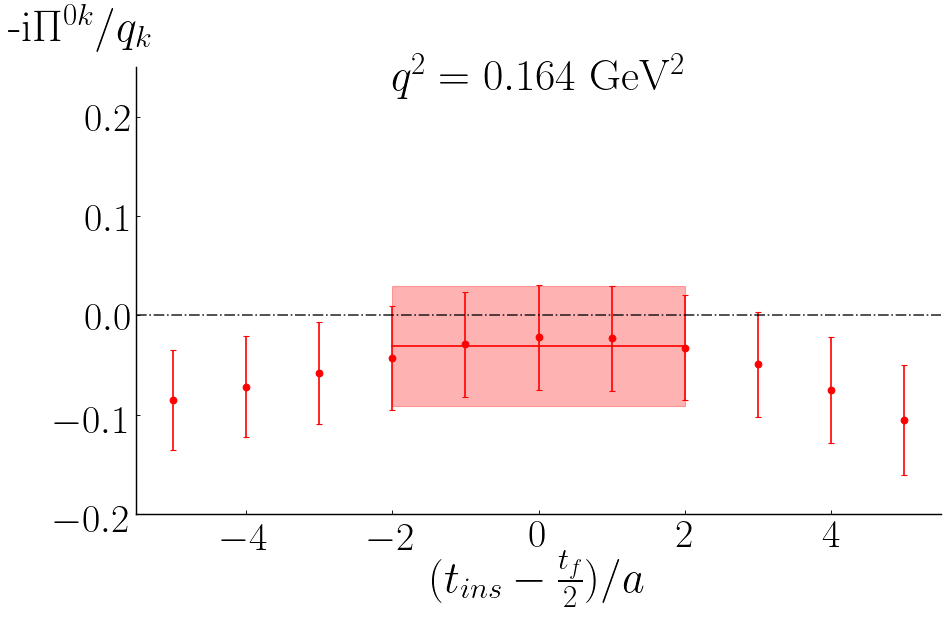

In [27]:
FSIZE  = 40
FSIZE1 = 36

INV_A   = 2.439184177997528

axs,figs  = [], []

kw = {'linestyle':'', 'marker':'o'}
# fig   = plt.figure(figsize=(39, 17))
# grid  = plt.GridSpec(17,39)#,wspace=0.25)
# axs   = []
# axs.append(fig.add_subplot( grid[:8,:12] ))
# axs.append(fig.add_subplot( grid[9:,:12] ))
# axs.append(fig.add_subplot( grid[:8,13:25], sharey=axs[0] ))
# axs.append(fig.add_subplot( grid[9:,13:25], sharey=axs[1] ))
# axs.append(fig.add_subplot( grid[:8,26:38], sharey=axs[0] ))
# axs.append(fig.add_subplot( grid[9:,26:38], sharey=axs[1] ))
#

y_text=[0.9,0.9,0.98]
for imsq,msq in enumerate(['msq0001', 'msq0002', 'msq0003']):

    ### Gluonic ###
    fig, ax     = plt.subplots(1,figsize=(12, 8))
    #ax = axs[imsq*2]
    col0  = colors[0]
    labtext=read_pickle('tmp_FFpl1_labtext_m%d.pkl'%imsq)[0]

    r=read_pickle('tmp_FFpl1_rg_m%d.pkl'%imsq)[0]
    
    print_plotfit( ax, np.linspace(*r['range'],10), lambda x, c: np.ones(len(x))*c, r['p']['jks'], 
                  fill={'alpha':0.3}, color=col0 )

    x, f, df = read_pickle('tmp_FFpl1_xfdfg_m%d.pkl'%imsq)    
    ax.errorbar(x, f, df, **kw, label='field theo.', color=col0 )
    
    ax.text(0.5,y_text[imsq], labtext, horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes, fontsize=FSIZE)
    axs.append(ax)
    figs.append(fig)

    ### Fermionic ###
    fig, ax     = plt.subplots(1,figsize=(12, 8))
    #ax = axs[imsq*2+1]

    col1  = colors[1]

    r = read_pickle('tmp_FFpl1_rf_m%d.pkl'%imsq)[0]
    
    print_plotfit( ax, np.linspace(*r['range'],10), lambda x, c: np.ones(len(x))*c, r['p']['jks'], 
                  fill={'alpha':0.3}, color=col1 )

    x, f, df = read_pickle('tmp_FFpl1_xfdff_m%d.pkl'%imsq)
    
    ax.errorbar( x, f, df, **kw, label='spectral proj.', color=col1 )
    #ax.legend(fontsize=FSIZE1)

    ax.text(0.5,y_text[imsq], labtext, horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes, fontsize=FSIZE)
    axs.append(ax)
    figs.append(fig)

#setcolors
for iax,ax in enumerate(axs):
    for sp in ax.spines.values():
        sp.set_linewidth(1.3) 

    # Decorations
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlabel(r'$(t_{ins}-\frac{t_f}{2})/a$', fontsize=FSIZE)
    ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)

    #ax.grid()

    #ax.set_ylim(-0.018,0.018)
    ax.axhline( 0, 0, 1, linestyle='-.', color='black', alpha=0.8)

    # # ax (Y axis)
    ax.set_ylabel(r'-i$\Pi^{0k}/q_k$', fontsize=FSIZE, rotation=0 )
    ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
    ax.set_ylim(-0.2,0.25)
    ax.yaxis.set_label_coords(-0.07,1.025)
    #ax.xaxis.set_label_coords(1.055, 0.010)

for ifig,fig in enumerate(figs):
    fig.tight_layout()
    fig.savefig('F3_tins_'+str(ifig)+'.pdf')
plt.show()

In [25]:
# NMOMS = 3

# fig     = plt.figure(figsize=(18,10)) 
# gridw   = 10*NMOMS+(NMOMS-1)
# grid    = plt.GridSpec(10,gridw,wspace=0.25)
# axs     = []
# axs.append(fig.add_subplot( grid[:,:10] ))

# for i in range(1,NMOMS):
#     axs.append( fig.add_subplot( grid[:,i*10+1*i:(i+1)*10+1*i], sharey=axs[-1]) )

# col0 = colors[0]

# #picked F3
# kw = { 'linestyle':'', 'marker':'o'}
# for i_msq in range(NMOMS):
    
#     x, y, dy = read_pickle('tmp_FFpl3a_xydyg_k%d.pkl'%(i_msq))
    
#     labtxt = read_pickle('tmp_FFpl3_labtxt_k%d.pkl'%(i_msq))[0]
    
#     axs[i_msq].errorbar( x, y, dy, color=col0, **kw )
#     axs[i_msq].text(3.5, 0.022, labtxt, horizontalalignment='center',
#             verticalalignment='center', fontsize=FSIZE)

# axs[0].set_ylabel(r"$\frac{F_3^{(1)}}{2m_N}$  [e $\cdot$ fm]",fontsize=FSIZE )
# axs[0].set_ylim(-0.01,0.025)

# for ax in axs:
#     ax.set_xlabel(r"$\tau_{flow}$",fontsize=FSIZE)
#     #ax.legend(fontsize=FSIZE,loc='upper right')
#     #ax.set_xticks( np.arange(10,51,10))

#     for sp in ax.spines.values():
#         sp.set_linewidth(1.3) 
#     ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
#     ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
#     ax.axhline( 0, 0, 1, linestyle='-.', color='black')

#     #ax.grid()
# for ax in axs[1:]:
#     for lab in ax.get_yticklabels():
#         lab.set_visible(False)
# fig.tight_layout()
# fig.savefig('F3_tau.pdf')
# plt.show()

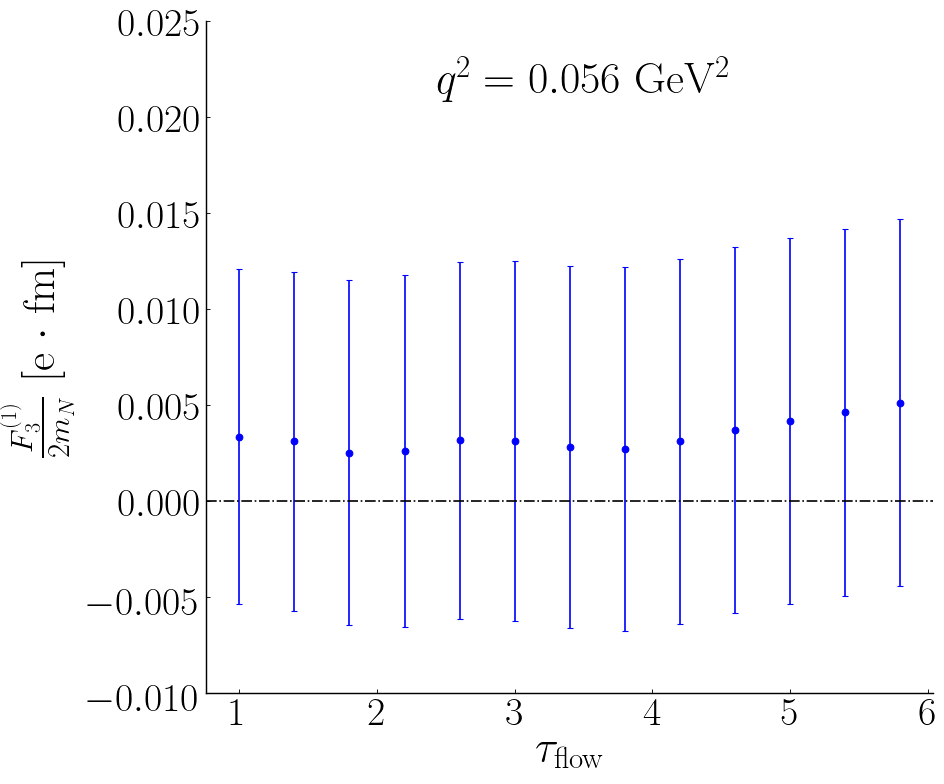

In [28]:
NMOMS = 3
FSIZE = 40
FSIZE1= 36

fig0, ax0 = plt.subplots(1,figsize=(12,10)) 
fig1, ax1 = plt.subplots(1,figsize=(12,10)) 
fig2, ax2 = plt.subplots(1,figsize=(12,10)) 
axs     = [ax0,ax1,ax2]

col0 = colors[0]

#picked F3
kw = { 'linestyle':'', 'marker':'o'}
for i_msq in range(NMOMS):
    
    x, y, dy = read_pickle('tmp_FFpl3a_xydyg_k%d.pkl'%(i_msq))
    
    labtxt = read_pickle('tmp_FFpl3_labtxt_k%d.pkl'%(i_msq))[0]
    
    axs[i_msq].errorbar( x, y, dy, color=col0, **kw )
    axs[i_msq].text(3.5, 0.022, labtxt, horizontalalignment='center',
            verticalalignment='center', fontsize=FSIZE)

axs[0].set_ylabel(r"$\frac{F_3^{(1)}}{2m_N}$  [e $\cdot$ fm]",fontsize=FSIZE )

for ax in axs:
    # Decorations
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_ylim(-0.01,0.025)
    ax.set_xlabel(r"$\tau_{\rm flow}$",fontsize=FSIZE)
    #ax.legend(fontsize=FSIZE,loc='upper right')
    #ax.set_xticks( np.arange(10,51,10))

    for sp in ax.spines.values():
        sp.set_linewidth(1.3) 
    ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
    ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
    ax.axhline( 0, 0, 1, linestyle='-.', color='black')

    #ax.grid()
# for ax in axs[1:]:
#     for lab in ax.get_yticklabels():
#         lab.set_visible(False)
fig0.tight_layout()
fig1.tight_layout()
fig2.tight_layout()
fig0.savefig('F3_taua.pdf')
fig1.savefig('F3_taub.pdf')
fig2.savefig('F3_tauc.pdf')
plt.show()

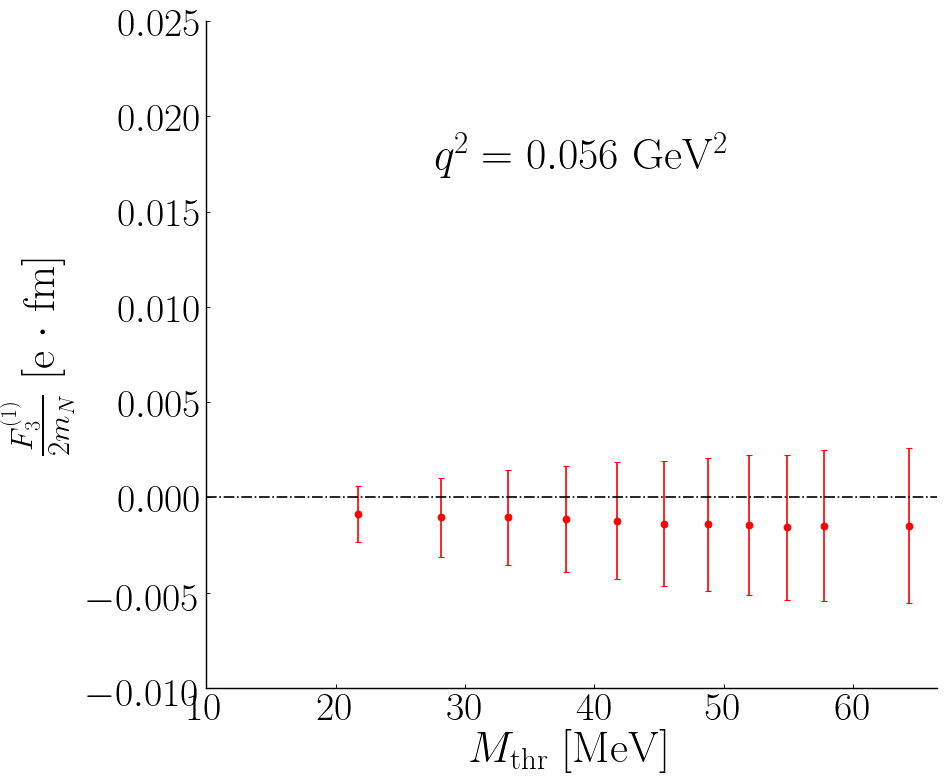

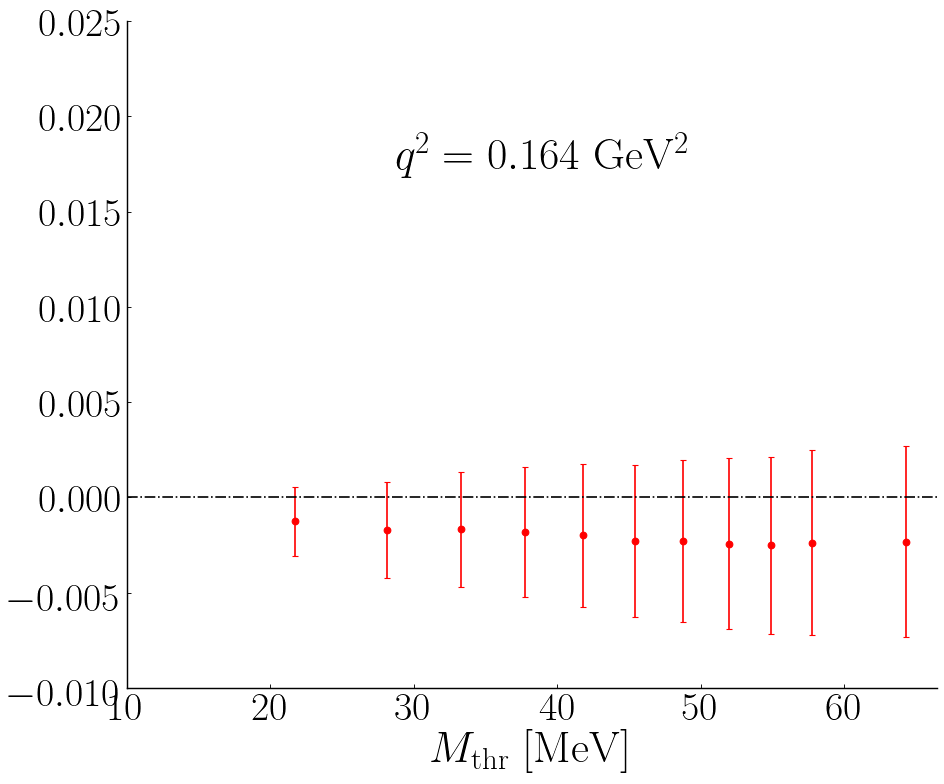

In [30]:
NMOMS = 3

NMOMS = 3
FSIZE = 40
FSIZE1= 36

fig0, ax0 = plt.subplots(1,figsize=(12,10)) 
fig1, ax1 = plt.subplots(1,figsize=(12,10)) 
fig2, ax2 = plt.subplots(1,figsize=(12,10)) 
axs     = [ax0,ax1,ax2]

col1 = colors[1]


#picked F3
kw = { 'linestyle':'', 'marker':'o', }
for i_msq in range(NMOMS):
    x, y, dy = read_pickle('tmp_FFpl3b_xydyf_k%d.pkl'%(i_msq))
    
    labtxt = read_pickle('tmp_FFpl3_labtxt_k%d.pkl'%(i_msq))[0]
    
    axs[i_msq].errorbar( x, y, dy, color=col1, **kw )
    axs[i_msq].text(39, 0.018, labtxt, horizontalalignment='center',
            verticalalignment='center', fontsize=FSIZE)
    axs[i_msq].set_ylim(-0.01,0.025)

axs[0].set_ylabel(r"$\frac{F_3^{(1)}}{2m_N}$  [e $\cdot$ fm]",fontsize=FSIZE)
#axs[0].set_ylim(-0.01,0.01)

for ax in axs:
    # Decorations
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlabel(r"$M_{\rm thr}$  [MeV]",fontsize=FSIZE)
    #ax.legend(fontsize=FSIZE,loc='upper right')
    ax.set_xticks( np.arange(10,65,10))

    for sp in ax.spines.values():
        sp.set_linewidth(1.3) 
    ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
    ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
    #ax.grid()
    ax.axhline( 0, 0, 1, linestyle='-.', color='black')
        
fig0.tight_layout()
fig1.tight_layout()
fig2.tight_layout()
fig0.savefig('F3_mthra.pdf')
fig1.savefig('F3_mthrb.pdf')
fig2.savefig('F3_mthrc.pdf')

plt.show()

In [51]:
# NMOMS = 3

# fig     = plt.figure(figsize=(18,10)) 
# gridw   = 10*NMOMS+(NMOMS-1)
# grid    = plt.GridSpec(10,gridw,wspace=0.25)
# axs     = []
# axs.append(fig.add_subplot( grid[:,:10] ))

# for i in range(1,NMOMS):
#     axs.append( fig.add_subplot( grid[:,i*10+1*i:(i+1)*10+1*i], sharey=axs[-1]) )

# col1 = colors[1]


# #picked F3
# kw = { 'linestyle':'', 'marker':'o', }
# for i_msq in range(NMOMS):
#     x, y, dy = read_pickle('tmp_FFpl3b_xydyf_k%d.pkl'%(i_msq))
    
#     labtxt = read_pickle('tmp_FFpl3_labtxt_k%d.pkl'%(i_msq))[0]
    
#     axs[i_msq].errorbar( x, y, dy, color=col1, **kw )
#     axs[i_msq].text(39, 0.022, labtxt, horizontalalignment='center',
#             verticalalignment='center', fontsize=FSIZE)

# axs[0].set_ylabel(r"$\frac{F_3^{(1)}}{2m_N}$  [e $\cdot$ fm]",fontsize=FSIZE)
# #axs[0].set_ylim(-0.01,0.01)
# axs[0].set_ylim(-0.01,0.025)

# for ax in axs:
#     ax.set_xlabel(r"$M_{thr}$  [MeV]",fontsize=FSIZE)
#     #ax.legend(fontsize=FSIZE,loc='upper right')
#     ax.set_xticks( np.arange(10,65,10))

#     for sp in ax.spines.values():
#         sp.set_linewidth(1.3) 
#     ax.tick_params(axis='x', rotation=0, labelsize=FSIZE1, top=False)
#     ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
#     #ax.grid()
#     ax.axhline( 0, 0, 1, linestyle='-.', color='black')
# for ax in axs[1:]:
#     for lab in ax.get_yticklabels():
#         lab.set_visible(False)
        
# #fig.tight_layout()
# fig.savefig('F3_mthr.pdf')

# plt.show()

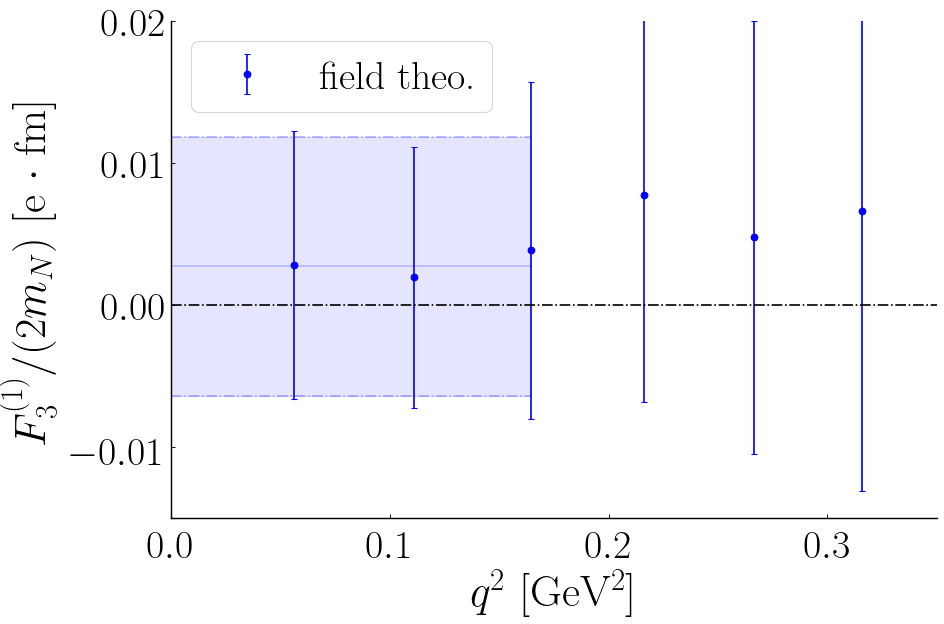

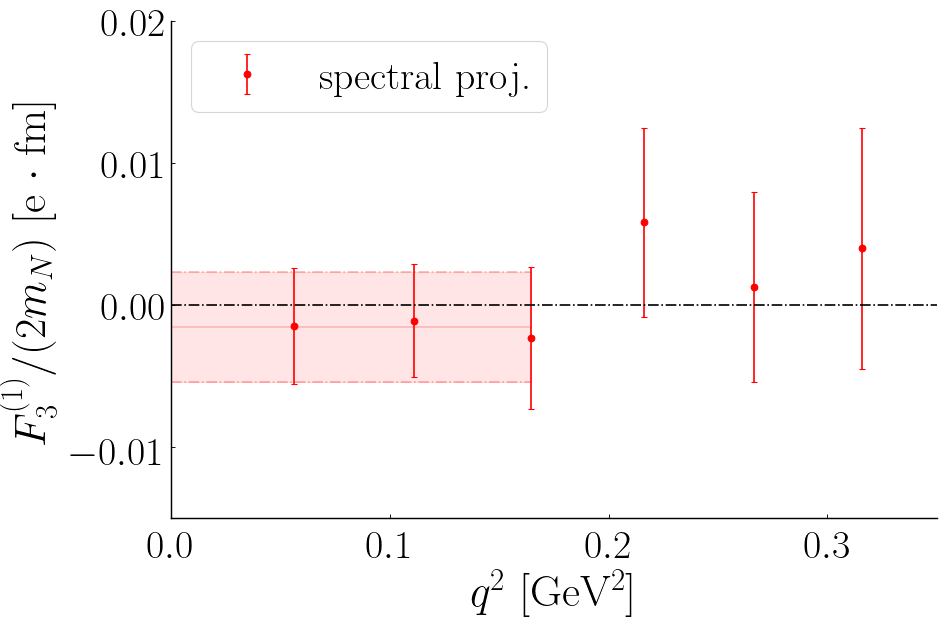

In [34]:
FSIZE = 40
FSIZE1= 36

###### 
kw = { 'linestyle':'', 'marker':'o'}
col0, col1 = colors[:2]

# define x
fig0, ax0 = plt.subplots(1, figsize=(12,8))
fig1, ax1 = plt.subplots(1, figsize=(12,8))

q2,F3g,dF3g = read_pickle('tmp_FFpl2_qfdfg.pkl')
q2,F3f,dF3f = read_pickle('tmp_FFpl2_qfdff.pkl')

ax0.errorbar( q2, F3g, dF3g, **kw , color=col0, label='field theo.')
ax1.errorbar( q2, F3f, dF3f, **kw, color=col1, label='spectral proj.' )

F3_extr = read_pickle('tmp_FFpl2_rfit.pkl')[0]

print_plotfit( ax1, np.linspace(0,F3_extr['f']['range'][1],10), lambda x,c: np.ones(len(x))*c,
                  F3_extr['f']['p']['jks'], fill={'alpha':0.1}, kwargs_blines={'linestyle':'-.','alpha':0.3},alpha=0.2,color=col1 )
print_plotfit( ax0, np.linspace(0,F3_extr['g']['range'][1],10), lambda x,c: np.ones(len(x))*c,
                  F3_extr['g']['p']['jks'], fill={'alpha':0.1}, kwargs_blines={'linestyle':'-.','alpha':0.3},alpha=0.2,color=col0 )

for ax in [ax0,ax1]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(0,0.35)
    ax.set_ylim(-0.015,0.02)

    for sp in ax.spines.values():
        sp.set_linewidth(1.3) 
    
    ax.axhline( 0, 0, 1, linestyle='-.', color='black' )
    # Decorations
    ax.set_xlabel(r'$q^2$ [GeV$^2$]', fontsize=FSIZE)

    ax.tick_params(axis='x',  pad=10, rotation=0, labelsize=FSIZE1, top=False)

    # # ax (Y axis)
    ax.set_ylabel(r'$F_3^{(1)}/(2 m_N)$ [e $\cdot$ fm]', fontsize=FSIZE)
    #ax.set_ylabel(r'$d_N^{(1)}$ [e $\cdot$ fm]', fontsize=FSIZE)

    ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False )
    ax.legend(fontsize=FSIZE1, loc='upper left')
    #ax.grid()
for ifig,fig in enumerate([fig0,fig1]):
    fig.tight_layout()
    fig.savefig('F3_q2'+str(ifig)+'.pdf')
plt.show()

In [ ]:
373,0.094,0.074 #Phys. Rev. D 93, 074503 (2016).

530,-0.048,0.068 #Phys. Rev. D 72, 014504 (2005)

    
690,-1.15,1.52 #Phys. Rev. D73, 054509 (2006)
605,1.14,2.98  #Phys. Rev. D73, 054509 (2006)

465,-0.130,0.076 #Phys. Rev. Lett. 115, 062001 (2015).
360,0.020, 0.058 #Phys. Rev. Lett. 115, 062001 (2015).



In [9]:
F3_extr['f']['p']['val'],F3_extr['f']['p']['err']

(array([-0.00153388]), array([0.00387434]))

In [55]:
latspac = 0.0809#(4)
M_N_jks  = read_pickle('nucleon_mass.pickle')[0]
coeff = (2*M_N_jks)/latspac
jackknife(F3_extr['f']['p']['jks']*coeff[:750,None])

(array([-0.0146107]), array([0.03690394]))

In [56]:
fig, ax = plt.subplots(1,figsize=(12,8))
ax.axvline(0, color='black', linestyle='--')
kw = {'capsize':8,'markersize':8, 'elinewidth':1.5, 'capthick':1.5}
xlim = (-0.2202, 0.0922)


m_pion = ['$m_{\pi}=138$ MeV','$m_{\pi}=360$ MeV','$m_{\pi}=373$ MeV',
          '$m_{\pi}=465$ MeV','$m_{\pi}=530$ MeV']
#ax.set_yticklabels(m_pion)
locmy   = [1,2,3,4,5]
#locmx   = [0,-0.01455+0.02966,0.020+0.058,0.094+0.074,-0.130+0.076,-0.048+0.068,6]
locmx   = [-0.01455,0.020,0.094,-0.130,-0.048]
#ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticks([])
colors = ['blue', 'red', 'green', 'purple']
markers= ['s','d','v','o']
 
ax.text(locmx[3], locmy[0], m_pion[0], horizontalalignment='center',
        verticalalignment='center', fontsize=FSIZE1-2)
ax.text(locmx[3], locmy[1], m_pion[1], horizontalalignment='center',
        verticalalignment='center', fontsize=FSIZE1-2)
ax.text(locmx[3], locmy[2], m_pion[2], horizontalalignment='center',
        verticalalignment='center', fontsize=FSIZE1-2)
ax.text(locmx[2], locmy[3], m_pion[3], horizontalalignment='center',
        verticalalignment='center', fontsize=FSIZE1-2)
ax.text(locmx[2], locmy[4], m_pion[4], horizontalalignment='center',
        verticalalignment='center', fontsize=FSIZE1-2)


#lab5="Phys. Rev. D 72, 014504 (2005), $m_{\pi}=530$ MeV"
# lab5="Ref. [27], $m_{\pi}=530$ MeV"
# lab4="Ref. [32], $m_{\pi}=465$ MeV"
# lab3="Ref. [35], $m_{\pi}=373$ MeV"
# lab2="Ref. [32], $m_{\pi}=360$ MeV"
# lab1="This work, $m_{\pi}=138$ MeV"
lab5="Ref. [27]"
lab4="Ref. [32]"
lab3="Ref. [35]"
lab1="This work"

x0,dx0=[-0.048,],[0.068,]
ax.errorbar(x0,[5,],xerr=dx0, color=colors[0], marker=markers[0], label=lab5,**kw)

# x1,dx1=[-1.15,],[1.52,]
# ax.errorbar(x1,[6,],xerr=dx1, **kw)

# x2,dx2=[1.14,],[2.98,]
# ax.errorbar(x2,[5,],xerr=dx2, **kw)

x3,dx3=[-0.130,],[0.076,]
ax.errorbar(x3,[4,],xerr=dx3, color=colors[1] , marker=markers[1], label=lab4, **kw)

x4,dx4=[0.020,],[0.058,]
ax.errorbar(x4,[2,],xerr=dx4, color=colors[1], marker=markers[1],**kw)

x5,dx5=[0.094,],[0.074,]
ax.errorbar(x5,[3,],xerr=dx5, color=colors[2], marker=markers[2],label=lab3,**kw)

x6, dx6 = [-0.0146107,],[0.03690394,]
ax.errorbar(x6,[1,],xerr=dx6, color=colors[3], marker=markers[3],label=lab1,**kw)

ax.set_xlabel(r'$F_3$', fontsize=FSIZE)

ax.tick_params(axis='x',  pad=10, rotation=0, labelsize=FSIZE1, top=False)
ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False, left=False )
ax.legend(bbox_to_anchor=(1., 1.),fontsize=FSIZE1-2,loc='upper left')

fig.tight_layout()
fig.savefig('tmpResComp.pdf')
plt.show()

### alternative plot

In [4]:
hbarc=197.33 #MeV*fm

In [62]:
d, dd = -0.0045, 0.0026#-0.009,0.0027#-0.0027, 0.0020
m, dm = 1219,4 #1415, 3# 1585, 2

f3  = d*(2*m)/hbarc
df3 = d*(2*m)*math.sqrt( (dd/d)**2 + (dm/m)**2 )/hbarc
f3, df3

(-0.05559722292606293, -0.032123357962431674)

In [31]:
import matplotlib as mpl
mpl.use('pgf')
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

lab6="$J.Dragos$ $et$ $al$, 2019 \cite{Dragos:2019oxn}"
lab5="$E.Shintani$ $et$ $al$, 2005 \cite{Shintani:2005xg}"
lab4="$F.-K.Guo$ $et$ $al$, 2015 \cite{Guo:2015tla},"
lab3="$C.Alexandrou$ $et$ $al$, 2016 \cite{Alexandrou:2015spa}"
lab1="This work"

# mass_n = {lab5:[[1.334,0.008],],
#  lab4:[[1.246,0.007],[1.138,0.013]],
#  lab3:[[1.216,0.004]],
# }

# data_toplot = {lab6:[[699,-0.043, 0.032],[567.6,-0.129, 0.038],[409.7,-0.056, 0.032]],
#                lab5:[[530,-0.048,0.068]],
#                lab4:[[465,-0.130,0.076],[360,0.020,0.058]],
#                lab3:[[373,0.094,0.074]],
#                lab1:[[138,-0.0146107,0.03690394]]
#               }

def calc_d(f3,df3,m,dm):
    d  = 0.19733*f3/(2*m)
    dd = d*math.sqrt((df3/f3)**2+(dm/m)**2)
    return d, dd

data_toplot = {lab6:[[699,-0.0027, 0.0020],[567.6,-0.009, 0.0027],[409.7,-0.0045, 0.0026]],
               lab5:[[530,]+list(calc_d(-0.048,0.068,1.334,0.008))],
               lab4:[[465,]+list(calc_d(-0.130,0.076,1.246,0.007)),[360,]+list(calc_d(0.020,0.058,1.138,0.013))],
               lab3:[[373,]+list(calc_d(0.094,0.074,1.216,0.004))],
               lab1:[[138,-0.00153388,0.00387434]]
              }


In [32]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

tw = 472.03123

/home/antonino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


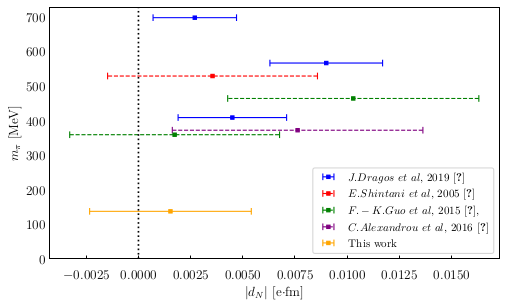

In [34]:
FSIZE=12
FSIZE1=12
fig, ax = plt.subplots(1,figsize=set_size(472))
ax.axvline(0, color='black', linestyle=':')
kw = {'linestyle':'','capsize':3,'markersize':3, 'elinewidth':1., 'capthick':1.}
xlim = (-0.2202, 0.0922)
colors = ['blue', 'red', 'green', 'purple', 'orange']
markers= ['s']*5#['s','d','v','o','>']

for i_w,(lab,dat) in enumerate(data_toplot.items()):
    y, x, dx = np.array(dat).T

    _,_,e=ax.errorbar(abs(x), y,xerr=dx, color=colors[i_w], marker=markers[i_w], label=lab,**kw)
    if lab!=lab6 and lab!=lab1:
        e[0].set_linestyle('--')
    
ax.set_xlabel(r'$|d_N|$ [e$\cdot$fm]', fontsize=FSIZE)
ax.set_ylabel(r'$m_{\pi}$ [MeV]', fontsize=FSIZE)

ax.tick_params(axis='x',  pad=10, rotation=0, labelsize=FSIZE1, top=False)
ax.tick_params(axis='y', rotation=0, labelsize=FSIZE1, right=False, left=False )
ax.legend(fontsize=FSIZE1-2,loc='lower right')
ax.set_ylim(0)
fig.tight_layout()
fig.savefig("OtherPapersComparison.pgf",backend='pgf')
plt.show()